# Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('league-of-legends/games.csv')

# Data understanding

In [2]:
print(data.columns)
print(data.head())

print(data.isnull().sum())
data.describe().round(2)

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.00,51490.0,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00,...,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00,51490.00
mean,3.306223e+09,1.502926e+12,1832.36,9.0,1.49,1.47,1.45,1.31,0.93,1.44,...,5.55,0.99,0.41,1.40,0.24,108.22,107.91,108.69,108.63,108.07
std,2.946096e+07,1.978026e+09,512.02,0.0,0.50,0.52,0.54,0.68,0.84,0.57,...,3.86,1.26,0.61,1.22,0.43,102.55,102.87,102.59,103.35,102.76
min,3.214824e+09,1.496892e+12,190.00,9.0,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,3.292218e+09,1.502021e+12,1531.00,9.0,1.00,1.00,1.00,1.00,0.00,1.00,...,2.00,0.00,0.00,0.00,0.00,38.00,37.00,38.00,38.00,38.00
50%,3.320021e+09,1.503844e+12,1833.00,9.0,1.00,1.00,1.00,1.00,1.00,1.00,...,6.00,0.00,0.00,1.00,0.00,90.00,90.00,90.00,90.00,90.00
75%,3.327099e+09,1.504352e+12,2148.00,9.0,2.00,2.00,2.00,2.00,2.00,2.00,...,9.00,2.00,1.00,2.00,0.00,141.00,141.00,141.00,141.00,141.00
max,3.331833e+09,1.504707e+12,4728.00,9.0,2.00,2.00,2.00,2.00,2.00,2.00,...,11.00,10.00,4.00,6.00,1.00,516.00,516.00,516.00,516.00,516.00


# Data preprocessing

## removing unecessary columns and splitting into ipnut and target values

In [3]:
# drop columns that are not useful for the model

data.drop(['gameId', 'creationTime', 'gameDuration', 'seasonId', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 'firstInhibitor', 'firstBaron', 't1_dragonKills', 't2_dragonKills'], axis=1, inplace=True)

team_selection_columns = ['winner', 'firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald']
for column in team_selection_columns:
    data[column].replace(2, 0, inplace=True) # as 1 mean team 1 was first and 2 means team 2 was first, replace 2 with 0 to indicate if team 1 was first or not (simplify data preprocessing)

print(data.head())

target = data['winner']
input = data.drop(['winner'], axis=1)


   winner  firstBlood  firstTower  firstDragon  firstRiftHerald  t1_champ1id  \
0       1           0           1            1                0            8   
1       1           1           1            1                1          119   
2       1           0           1            0                0           18   
3       1           1           1            1                0           57   
4       1           0           1            1                0           19   

   t1_champ1_sum1  t1_champ1_sum2  t1_champ2id  t1_champ2_sum1  ...  \
0              12               4          432               3  ...   
1               7               4           39              12  ...   
2               4               7          141              11  ...   
3               4              12           63               4  ...   
4               4              12           29              11  ...   

   t2_champ4_sum2  t2_champ5id  t2_champ5_sum1  t2_champ5_sum2  \
0               4         

## encoding values (one hot encoding)

In [4]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

def one_hot_encode(data, column):
    encoded_data = onehotencoder.fit_transform(data[column].values.reshape(-1, 1)).toarray()
    encoded_data = pd.DataFrame(encoded_data, columns=[column + '_' + str(int(i)) for i in range(encoded_data.shape[1])])
    data = data.drop(column, axis=1)
    return pd.concat([data, encoded_data], axis=1)

columns_to_encode = ['t1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5'] # having this much columns to encode may slow down the training process, some columns may need to be dropped

light_columns_to_encode = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id',
                            't2_champ3id', 't2_champ4id', 't2_champ5id']

light_encoding = True

for column in columns_to_encode:
    if light_encoding and column not in light_columns_to_encode:
        input.drop(column, axis=1, inplace=True) # drop columns that are not in light_columns_to_encode
    else:
        input = one_hot_encode(input, column)

print(input.columns)


Index(['firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald',
       't1_riftHeraldKills', 't2_riftHeraldKills', 't1_champ1id_0',
       't1_champ1id_1', 't1_champ1id_2', 't1_champ1id_3',
       ...
       't2_champ5id_128', 't2_champ5id_129', 't2_champ5id_130',
       't2_champ5id_131', 't2_champ5id_132', 't2_champ5id_133',
       't2_champ5id_134', 't2_champ5id_135', 't2_champ5id_136',
       't2_champ5id_137'],
      dtype='object', length=1386)


## normalizing values

In [5]:
# Normalizing the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['t1_riftHeraldKills', 't2_riftHeraldKills']

input[columns_to_normalize] = scaler.fit_transform(input[columns_to_normalize])

print(input.head())

   firstBlood  firstTower  firstDragon  firstRiftHerald  t1_riftHeraldKills  \
0           0           1            1                0                 0.0   
1           1           1            1                1                 1.0   
2           0           1            0                0                 0.0   
3           1           1            1                0                 0.0   
4           0           1            1                0                 0.0   

   t2_riftHeraldKills  t1_champ1id_0  t1_champ1id_1  t1_champ1id_2  \
0                 1.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   

   t1_champ1id_3  ...  t2_champ5id_128  t2_champ5id_129  t2_champ5id_130  \
0            0.0  ...       

## class balancing

<Axes: xlabel='winner', ylabel='count'>

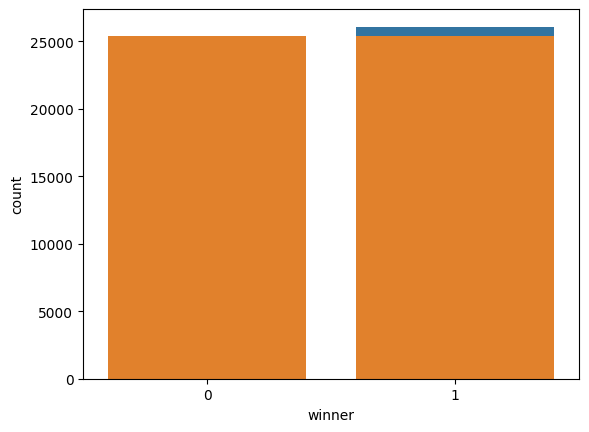

In [6]:
# Class balancing

import seaborn as sns

sns.countplot(x = target)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
input, target = rus.fit_resample(input, target)

sns.countplot(x = target)

# Training and Testing

## spliting

In [7]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3)

# model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression ()
log_reg.fit(X_train, y_train)

def accuracy_score_lr(model, X, y):
    return np.mean(model.predict(X) == y)

def precision_score_lr(model, X, y):
    TP = np.sum((model.predict(X) == 1) & (y == 1))
    FP = np.sum((model.predict(X) == 1) & (y == 0))
    return TP / (TP + FP)

print('Train accuracy:', accuracy_score_lr(log_reg, X_train, y_train))
print('Test accuracy:', accuracy_score_lr(log_reg, X_test, y_test))


Train accuracy: 0.7407667659789757
Test accuracy: 0.7195041972717734


In [8]:
#KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100

print("KNN - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_pred))


KNN - Accuracy: 66.002.

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      7700
           1       0.65      0.67      0.66      7548

    accuracy                           0.66     15248
   macro avg       0.66      0.66      0.66     15248
weighted avg       0.66      0.66      0.66     15248



In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5028 2672]
 [2512 5036]]


Text(0.5, 1.0, 'Consfusion Matrix')

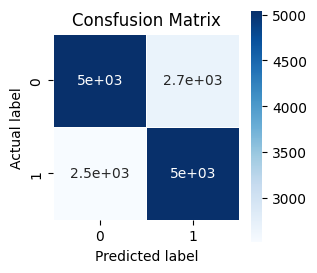

In [10]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Consfusion Matrix", size = 12)

In [ ]:
#HP Tunning

from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
from numpy import arange

# parameters = {
#     'n_neighbors': arange(5, 10, 1),
#     'weights' : ['uniform', 'distance'],
#     'algorithm' : ['auto'],
#     'leaf_size': arange(30, 50, 5),
#     'p' : (1,2) # p=1 for manhattan_distance and p=2 for euclidean_distance
# }

parameters = {
    'n_neighbors': arange(5, 10, 1),
    'weights' : ['distance'],
    'algorithm' : ['auto'],
    'leaf_size': arange(3, 50, 5),
    'p' : [2] # p=1 for manhattan_distance and p=2 for euclidean_distance
}



knn_grid = GridSearchCV(estimator = knn, param_grid = parameters, cv = 5, n_jobs = -1, verbose = 1)

# Fit the grid search model
with parallel_backend('multiprocessing'):
    knn_grid.fit(X_train, y_train)

print("\nBest Parameters: ", knn_grid.best_params_)
print("Best Scores: ", knn_grid.best_score_) 

y_pred = knn_grid.predict(X_test)

# Get the accuracy score
knn_acc = accuracy_score(y_test, y_pred)*100
knn_pre = precision_score(y_test, y_pred, average = 'micro')
knn_recall = recall_score(y_test, y_pred, average = 'micro')
knn_f1_ = f1_score(y_test, y_pred, average = 'micro')

print("\nKNN - Accuracy: {:.3f}.".format(knn_acc))
print("KNN - Precision: {:.3f}.".format(knn_pre))
print("KNN - Recall: {:.3f}.".format(knn_recall))
print("KNN - F1_Score: {:.3f}.".format(knn_f1_))
print ('\n Clasification Report:\n', classification_report(y_test, y_pred))
print()

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(df1.head())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
